<a href="https://colab.research.google.com/github/Henrymnt/IdentificationofKeyModeStyle/blob/main/IdentificationofKeyModeStyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Get Dependencies/Libraries
!pip3 install mido
# https://www.reddit.com/r/audioengineering/comments/pgl5fr/looking_for_a_software_to_extract_statistics_from/
# https://pypi.org/project/mido/
import mido
import os, shutil
import math, collections
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
#@title Get Training Dataset
from google.colab import drive
drive.mount('/content/gdrive')
dst = "/content/data"
src = "/content/gdrive/MyDrive/classical_archives_midi_library"
shutil.copytree(src,dst)


ValueError: mount failed

In [ ]:
#@title Extract Notes
def extract_notes(file):
  mid = mido.MidiFile(file)
  notes = []
  for track in mid.tracks:
    for msg in track:
      # print(msg)
      if msg.type == 'note_on':
            notes.append(
                msg.note
            )
  # notes = [msg.note for msg in mid.play() if msg.type == "note_on"]
  amt_notes=len(notes)

  # print(notes)


  note_dataframe = np.array(notes)
  notes_25p=notes[0: math.floor(amt_notes/8)] + notes[math.floor((3*amt_notes)/8): math.floor((4*amt_notes)/8)] + notes[math.floor((4*amt_notes)/8): math.floor((5*amt_notes)/8)] + notes[math.floor((7*amt_notes)/8): (amt_notes)]
  notes_10p=notes[0: math.floor(amt_notes/20)] + notes[math.floor((9*amt_notes)/20): math.floor((10*amt_notes)/20)] + notes[math.floor((10*amt_notes)/20): math.floor((11*amt_notes)/20)] + notes[math.floor((19*amt_notes)/20): (amt_notes)]
  note_dataframe_25p = np.array(notes_25p)
  note_dataframe_10p = np.array(notes_10p)
  # print(note_dataframe)
  # print(note_dataframe_25p)
  # print(note_dataframe_10p)

  note_frequency=[]
  note_frequency_25p=[]
  note_frequency_10p=[]
  note_data = collections.Counter(notes)
  for note, times_played in note_data.items():
      note_frequency.append([
          note,
          times_played
      ])
  note_frequency.sort()

  note_data_25p = collections.Counter(notes_25p)
  for note, times_played in note_data_25p.items():
      note_frequency_25p.append([
          note,
          times_played
      ])
  note_frequency_25p.sort()

  note_data_10p = collections.Counter(notes_10p)
  for note, times_played in note_data_10p.items():
      note_frequency_10p.append([
          note,
          times_played
      ])
  note_frequency_10p.sort()


  note_frequency_nparr=np.array(note_frequency)
  note_frequency_nparr_25p=np.array(note_frequency_25p)
  note_frequency_nparr_10p=np.array(note_frequency_10p)
  # print(note_frequency)
  # print(note_frequency_25p)
  # print(note_frequency_10p)

  note_frequency2={"C": 0,
                   "C#": 0,
                   "D": 0,
                   "Eb": 0,
                   "E": 0,
                   "F": 0,
                   "F#": 0,
                   "G": 0,
                   "Ab": 0,
                   "A": 0,
                   "Bb": 0,
                   "B": 0,
                   }
  for note in notes:
    if (note % 12) == 0:
      note_frequency2["C"]+=1
    if (note % 12) == 1:
      note_frequency2["C#"]+=1
    if (note % 12) == 2:
      note_frequency2["D"]+=1
    if (note % 12) == 3:
      note_frequency2["Eb"]+=1
    if (note % 12) == 4:
      note_frequency2["E"]+=1
    if (note % 12) == 5:
      note_frequency2["F"]+=1
    if (note % 12) == 6:
      note_frequency2["F#"]+=1
    if (note % 12) == 7:
      note_frequency2["G"]+=1
    if (note % 12) == 8:
      note_frequency2["Ab"]+=1
    if (note % 12) == 9:
      note_frequency2["A"]+=1
    if (note % 12) == 10:
      note_frequency2["Bb"]+=1
    if (note % 12) == 11:
      note_frequency2["B"]+=1
  # print(note_frequency2)

  for count in note_frequency2:
    note_frequency2[count] = (100*note_frequency2[count])/amt_notes

  note_frequency2_25p={"C": 0,
                   "C#": 0,
                   "D": 0,
                   "Eb": 0,
                   "E": 0,
                   "F": 0,
                   "F#": 0,
                   "G": 0,
                   "Ab": 0,
                   "A": 0,
                   "Bb": 0,
                   "B": 0,
                   }
  for note in notes_25p:
    if (note % 12) == 0:
      note_frequency2_25p["C"]+=1
    if (note % 12) == 1:
      note_frequency2_25p["C#"]+=1
    if (note % 12) == 2:
      note_frequency2_25p["D"]+=1
    if (note % 12) == 3:
      note_frequency2_25p["Eb"]+=1
    if (note % 12) == 4:
      note_frequency2_25p["E"]+=1
    if (note % 12) == 5:
      note_frequency2_25p["F"]+=1
    if (note % 12) == 6:
      note_frequency2_25p["F#"]+=1
    if (note % 12) == 7:
      note_frequency2_25p["G"]+=1
    if (note % 12) == 8:
      note_frequency2_25p["Ab"]+=1
    if (note % 12) == 9:
      note_frequency2_25p["A"]+=1
    if (note % 12) == 10:
      note_frequency2_25p["Bb"]+=1
    if (note % 12) == 11:
      note_frequency2_25p["B"]+=1
  # print(note_frequency2_25p)

  for count in note_frequency2_25p:
    note_frequency2_25p[count] = (100*note_frequency2_25p[count])/len(notes_25p)

  note_frequency2_10p={"C": 0,
                   "C#": 0,
                   "D": 0,
                   "Eb": 0,
                   "E": 0,
                   "F": 0,
                   "F#": 0,
                   "G": 0,
                   "Ab": 0,
                   "A": 0,
                   "Bb": 0,
                   "B": 0,
                   }
  for note in notes_10p:
    if (note % 12) == 0:
      note_frequency2_10p["C"]+=1
    if (note % 12) == 1:
      note_frequency2_10p["C#"]+=1
    if (note % 12) == 2:
      note_frequency2_10p["D"]+=1
    if (note % 12) == 3:
      note_frequency2_10p["Eb"]+=1
    if (note % 12) == 4:
      note_frequency2_10p["E"]+=1
    if (note % 12) == 5:
      note_frequency2_10p["F"]+=1
    if (note % 12) == 6:
      note_frequency2_10p["F#"]+=1
    if (note % 12) == 7:
      note_frequency2_10p["G"]+=1
    if (note % 12) == 8:
      note_frequency2_10p["Ab"]+=1
    if (note % 12) == 9:
      note_frequency2_10p["A"]+=1
    if (note % 12) == 10:
      note_frequency2_10p["Bb"]+=1
    if (note % 12) == 11:
      note_frequency2_10p["B"]+=1

  for count in note_frequency2_10p:
    note_frequency2_10p[count] = (100*note_frequency2_10p[count])/len(notes_10p)

  return note_frequency2, note_frequency2_25p, note_frequency2_10p


In [ ]:
#@title Extract Rhythmic Data
def extract_rhythm(file):
    mid = mido.MidiFile(file)
    rhythms = []
    indexmarker=0
    for track in mid.tracks:
      for msg in track:
        print(msg)
        if msg.type == 'note_on' or msg.type == 'note_off':
          if (msg.time == 1) and (indexmarker>0):
            rhythms[indexmarker-1][1]+=1
          elif msg.time == 0:
            continue
          else:
            # print(msg)
            rhythms.append([
                msg.note,
                msg.time,
            ])
            # print(msg.time)
            indexmarker+=1
    amt_rhythms=len(rhythms)
    rhythmratio_data=[]
    rhythmratio_frequency_data=[]
    for i in range(0,len(rhythms)-2):
      raw_ratio=rhythms[i][1]/rhythms[i+1][1]
      exponent=(math.log(raw_ratio,2) % 1)
      ratio=round((2 ** exponent),3)
      # print(ratio, rhythms[i][0], rhythms[i][1],rhythms[i+1][1])
      rhythmratio_data.append(ratio)
      rhythm_data = collections.Counter(rhythmratio_data)
    for ratio, times in rhythm_data.items():
        rhythmratio_frequency_data.append([
            ratio,
            ((100*times)/(amt_rhythms-1))
        ])
    rhythmratio_frequency_data.sort()
    # print(rhythmratio_frequency_data)

    rhythms_25p=rhythms[0: math.floor(amt_rhythms/8)] + rhythms[math.floor((3*amt_rhythms)/8): math.floor((4*amt_rhythms)/8)] + rhythms[math.floor((4*amt_rhythms)/8): math.floor((5*amt_rhythms)/8)] + rhythms[math.floor((7*amt_rhythms)/8): (amt_rhythms)]
    rhythms_10p=rhythms[0: math.floor(amt_rhythms/20)] + rhythms[math.floor((9*amt_rhythms)/20): math.floor((10*amt_rhythms)/20)] + rhythms[math.floor((10*amt_rhythms)/20): math.floor((11*amt_rhythms)/20)] + rhythms[math.floor((19*amt_rhythms)/20): (amt_rhythms)]


    note_frequency_weighted={"C": 0,
                    "C#": 0,
                    "D": 0,
                    "Eb": 0,
                    "E": 0,
                    "F": 0,
                    "F#": 0,
                    "G": 0,
                    "Ab": 0,
                    "A": 0,
                    "Bb": 0,
                    "B": 0,
                    }
    amt_notes_weighted=0
    for rhythm in rhythms:
      amt_notes_weighted+=rhythm[1]
      if (rhythm[0] % 12) == 0:
        note_frequency_weighted["C"]+=rhythm[1]
      if (rhythm[0] % 12) == 1:
        note_frequency_weighted["C#"]+=rhythm[1]
      if (rhythm[0] % 12) == 2:
        note_frequency_weighted["D"]+=rhythm[1]
      if (rhythm[0] % 12) == 3:
        note_frequency_weighted["Eb"]+=rhythm[1]
      if (rhythm[0] % 12) == 4:
        note_frequency_weighted["E"]+=rhythm[1]
      if (rhythm[0] % 12) == 5:
        note_frequency_weighted["F"]+=rhythm[1]
      if (rhythm[0] % 12) == 6:
        note_frequency_weighted["F#"]+=rhythm[1]
      if (rhythm[0] % 12) == 7:
        note_frequency_weighted["G"]+=rhythm[1]
      if (rhythm[0] % 12) == 8:
        note_frequency_weighted["Ab"]+=rhythm[1]
      if (rhythm[0] % 12) == 9:
        note_frequency_weighted["A"]+=rhythm[1]
      if (rhythm[0] % 12) == 10:
        note_frequency_weighted["Bb"]+=rhythm[1]
      if (rhythm[0] % 12) == 11:
        note_frequency_weighted["B"]+=rhythm[1]
    # print(note_frequency_weighted)

    for count in note_frequency_weighted:
      note_frequency_weighted[count] = (100*note_frequency_weighted[count])/amt_notes_weighted

    note_frequency_weighted_25p={"C": 0,
                    "C#": 0,
                    "D": 0,
                    "Eb": 0,
                    "E": 0,
                    "F": 0,
                    "F#": 0,
                    "G": 0,
                    "Ab": 0,
                    "A": 0,
                    "Bb": 0,
                    "B": 0,
                    }
    amt_notes_weighted_25p=0
    for rhythm in rhythms_25p:
      amt_notes_weighted_25p+=rhythm[1]
      if (rhythm[0] % 12) == 0:
        note_frequency_weighted_25p["C"]+=rhythm[1]
      if (rhythm[0] % 12) == 1:
        note_frequency_weighted_25p["C#"]+=rhythm[1]
      if (rhythm[0] % 12) == 2:
        note_frequency_weighted_25p["D"]+=rhythm[1]
      if (rhythm[0] % 12) == 3:
        note_frequency_weighted_25p["Eb"]+=rhythm[1]
      if (rhythm[0] % 12) == 4:
        note_frequency_weighted_25p["E"]+=rhythm[1]
      if (rhythm[0] % 12) == 5:
        note_frequency_weighted_25p["F"]+=rhythm[1]
      if (rhythm[0] % 12) == 6:
        note_frequency_weighted_25p["F#"]+=rhythm[1]
      if (rhythm[0] % 12) == 7:
        note_frequency_weighted_25p["G"]+=rhythm[1]
      if (rhythm[0] % 12) == 8:
        note_frequency_weighted_25p["Ab"]+=rhythm[1]
      if (rhythm[0] % 12) == 9:
        note_frequency_weighted_25p["A"]+=rhythm[1]
      if (rhythm[0] % 12) == 10:
        note_frequency_weighted_25p["Bb"]+=rhythm[1]
      if (rhythm[0] % 12) == 11:
        note_frequency_weighted_25p["B"]+=rhythm[1]
    # print(note_frequency_weighted_25p)

    for count in note_frequency_weighted_25p:
      note_frequency_weighted_25p[count] = (100*note_frequency_weighted_25p[count])/amt_notes_weighted_25p

    note_frequency_weighted_10p={"C": 0,
                    "C#": 0,
                    "D": 0,
                    "Eb": 0,
                    "E": 0,
                    "F": 0,
                    "F#": 0,
                    "G": 0,
                    "Ab": 0,
                    "A": 0,
                    "Bb": 0,
                    "B": 0,
                    }
    amt_notes_weighted_10p=0
    for rhythm in rhythms_10p:
      amt_notes_weighted_10p+=rhythm[1]
      if (rhythm[0] % 12) == 0:
        note_frequency_weighted_10p["C"]+=rhythm[1]
      if (rhythm[0] % 12) == 1:
        note_frequency_weighted_10p["C#"]+=rhythm[1]
      if (rhythm[0] % 12) == 2:
        note_frequency_weighted_10p["D"]+=rhythm[1]
      if (rhythm[0] % 12) == 3:
        note_frequency_weighted_10p["Eb"]+=rhythm[1]
      if (rhythm[0] % 12) == 4:
        note_frequency_weighted_10p["E"]+=rhythm[1]
      if (rhythm[0] % 12) == 5:
        note_frequency_weighted_10p["F"]+=rhythm[1]
      if (rhythm[0] % 12) == 6:
        note_frequency_weighted_10p["F#"]+=rhythm[1]
      if (rhythm[0] % 12) == 7:
        note_frequency_weighted_10p["G"]+=rhythm[1]
      if (rhythm[0] % 12) == 8:
        note_frequency_weighted_10p["Ab"]+=rhythm[1]
      if (rhythm[0] % 12) == 9:
        note_frequency_weighted_10p["A"]+=rhythm[1]
      if (rhythm[0] % 12) == 10:
        note_frequency_weighted_10p["Bb"]+=rhythm[1]
      if (rhythm[0] % 12) == 11:
        note_frequency_weighted_10p["B"]+=rhythm[1]
    # print(note_frequency_weighted_10p)

    for count in note_frequency_weighted_10p:
      note_frequency_weighted_10p[count] = (100*note_frequency_weighted_10p[count])/amt_notes_weighted_10p




    return rhythmratio_frequency_data, note_frequency_weighted, note_frequency_weighted_25p,note_frequency_weighted_10p



MetaMessage('text', text='Creator: GNU LilyPond 2.6.4.3          ', time=0)
MetaMessage('text', text='Generated automatically by: GNU LilyPond 2.6.4.3          ', time=0)
MetaMessage('text', text='at Sun Jan  1 18:57:57 2006                                 ', time=0)
MetaMessage('text', text='at Sun Jan  1 18:57:57 2006                                 ', time=0)
MetaMessage('track_name', name='Track 0', time=0)
MetaMessage('end_of_track', time=0)
note_on channel=0 note=71 velocity=127 time=0
MetaMessage('key_signature', key='G', time=0)
MetaMessage('time_signature', numerator=2, denominator=4, clocks_per_click=18, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('track_name', name='up', time=0)
MetaMessage('set_tempo', tempo=833333, time=0)
note_on channel=0 note=67 velocity=127 time=256
note_off channel=0 note=71 velocity=64 time=128
note_off channel=0 note=67 velocity=64 time=0
note_on channel=0 note=79 velocity=127 time=0
note_on channel=0 note=67 velocity=127 time=256
note_off ch

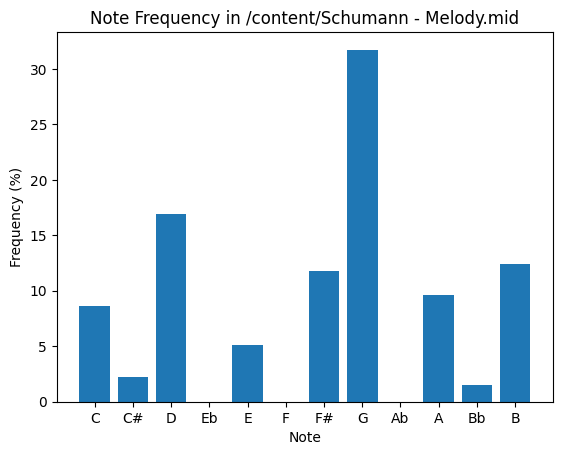

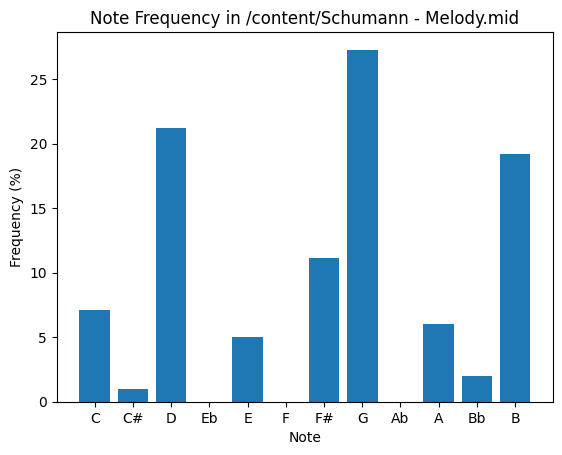

In [ ]:
#@title Main
src="/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Anh08Nb1 Gavotte 4 hands.mid"
a,b,c,d = extract_rhythm(src)
e,f,g = extract_notes(src)
a.sort(key=lambda x: x[1], reverse=True)
print(a)
print(b)
print(d)

labels=[]
data=[]
for note in b:
  labels.append(note)
  data.append(b[note])

plt.bar(labels, data)
plt.xlabel('Note')
plt.ylabel('Frequency (%)')
plt.title('Note Frequency in ' + src)
plt.show()

labels=[]
data=[]
for note in d:
  labels.append(note)
  data.append(d[note])

plt.bar(labels, data)
plt.xlabel('Note')
plt.ylabel('Frequency (%)')
plt.title('Note Frequency in ' + src)
plt.show()


In [ ]:
#@title Style Modifications Dataset
modified_style_index = [
"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n3 3mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Wagner2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n4 2mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op20 n1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Gershuin Rhapsody In Blue Piano Duet.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Lizt Piano Concerto n1 S124.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 5mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Sibelius Kuolema Vals op44.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 4mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Ginastera Estancia.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 9mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 7-8movs.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv155 Toccata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Symphony Rmw12 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n4 1mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Oboe Concerto Rmw09 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op60 n3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv157 Tocatta and Fugue.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Grieg Piano Concerto 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 6mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Symphony Rmw12 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv153 Prelude.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 10mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bizet Carmen Prelude.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Oboe Concerto Rmw09 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Debussy Suite Bergamasque 4mov.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reger Burlesque op58 n3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reinecke Piano Concerto n3 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Symphony op70 n7 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv136 Prelude.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n7.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Wagner Ride of the valkyries.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv145 Prelude.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv158 Preambulum.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Paganini Etude n1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/C.P.E.Bach Solfeggieto.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n1 3mov.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Piano Sonata Rmw13 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Piano Sonata Rmw13 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 13mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Paganini Etude n3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op60 n2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bizet Symphony in C 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Oboe Concerto Rmw09 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv160 Ciacona.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Bach Prelude Transcription.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Piano Sonata Rmw13 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Symphony op70 n7 4mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rimsky Korsakov ''Flight Of the Bumblebee''.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pollen Beguine Royale.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Trio op26.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reger Burlesque op58 n5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Paganini Etude n2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Nicolai Overture The Merry Wives of Windsor.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n2 3mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Grieg Piano Concerto op16 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Slavonic dance n8.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/meditation thais.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n1 2mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reinecke Piano Concerto n3 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n3 2mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Symphony op70 n7 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reinecke Piano Concerto n3 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 12mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Ab irato ''The Perfect Etude'' S143 R4b.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n1 1mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv167 Canzonetta.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n3 1mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bartok Suite 2mov.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Reger Burlesque op58 n6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Horn Concerto Rmw16 1mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bizet Symphony in C 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Horn Concerto Rmw16 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchlid Symphony Rmw12 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Debussy Suite Bergamasque 2mov.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Debussy Suite Bergamasque 1mov.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bizet Symphony in C 4mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op55 n1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv138 Prelude.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 11mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv157 Toccata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv156 Toccata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 14mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n2 2mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rothchild Horn Concerto Rmw16 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Dvorak Symphony op70 n7 2mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv161 Passcaglia.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bizet Symphony in C 3mov.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n2 1mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Paganini Etude n5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op55 n3 1mov.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv162 Prelude.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bartok Suite 1mov.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Debussy Suite Bergamasque 3mov.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/2001_2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5th1stmv.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/76tubas.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/1812over.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5th2ndmv.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsymp.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/76tmbons.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsymph.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5th3rdmv.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/2ptinv1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsym.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/willtell.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachbel0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reviere.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/soshunfu.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/viv176.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sakura2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata04.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/scarlatt.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/scherzo.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pmp_circ.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spring.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonota3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vdg5_rvn.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonase.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatina.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/raiders.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/picture.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata11.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/voice.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/snata3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pirate.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pete_wlf.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prok_toc.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trepak.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sclati.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud11.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludgm.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonaz.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pete&wlf.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludio.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/surprise.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sinfonie.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vbsuite.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symph_5.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/skywaltz.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trumpetv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/variatg.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud18.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p22b_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/varipaga.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno83m.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tocatta.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p21b_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rv-107.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p02cmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pa_cand.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tanz1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachebel.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vv_sprin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/schu-120.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/str-danc.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludec.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p17a_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud01.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p10emin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/podria.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelue_3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tento2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p11fmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rego2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata_3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud19.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud02.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud10.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p20amin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/ravel.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pete_wl1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p06dmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/watermk.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vaudevil.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/torredor.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solfeg.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p13f_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud22.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelude.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rapinbl.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/soler_c1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/scarl4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/waldstin.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/saint.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p04c_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/schumann.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludef.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p14f_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p24bmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/passepi.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata01.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud03.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rapinblu.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud16.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/volte.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solace.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pmpcicum.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sin15.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatac.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/startrk.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tub-bell.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud23.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/strav1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/saber.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud09.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/partia.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/ros-barb.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pre28_20.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sugarplm.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/s_vivon.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/psugg.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p09emaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/picture0.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/ufdemang.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sor-17.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud06.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata03.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud07.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata05.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tellover.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p05dmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pomp.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p15gmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/variatio.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud17.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata06.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p18g_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/toccata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rv_jeude.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud21.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sttng2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud04.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/victory6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata08.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/song1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud08.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonmozrt.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/welltemp.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/werwelmi.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p16gmin.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi-.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonais.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno82m.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/soloasct.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p08e_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/strav3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/winter.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pre28_7.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno81m.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/strav2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rondeu.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/page22.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solfeggi.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tiperary.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sontina.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rev_etud.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rochbb.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno84m.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud05.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/summer.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pathetiq.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p23bmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/requiem.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trumpets.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p01cmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/psycho.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/yamato.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p19amaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/veloc_1a.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sho_fd_3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sontina3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/waltz.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p_cannon.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/starwar2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tribamer.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rach33n6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/valkyrie.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tocatina.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/peter.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solce.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/valse.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/twinkle.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelude1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tento1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/skaters.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/swtheme.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatain.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tanz8.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sin29.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sympho40.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tento3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rondo.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud20.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sabredan.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rtocc.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rwvalkyr.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud24.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi_.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reverie.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sym40-1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p12fmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reedpipe.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata07.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/world.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/satriani.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata09.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud15.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/purplds5.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata10.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tango.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p07e_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/yukifuru.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rhapso2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud12.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spfairy0.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud14.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/terrega.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/page44.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/smetmol.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata02.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachbel.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sakura2a.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sheba.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p03c_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tcha_rev.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spfairy.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/williamt.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rhapsody.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tanz5.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud13.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nightbal.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mandolin.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg_.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mzrtk550.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/johnblow.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/laststa2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mirlitns.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_02.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesus.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invno3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_03.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/messiah.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozmenu.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesjoy.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_06.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_07.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mywind3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/marcello.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jsconcer.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_8.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mzt-k117.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/opus14.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/latra.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k531.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mstrhou_.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_05.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonligh.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/marche.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut0over.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/midins.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lesmiz.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/joy.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/legrenzi.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlite.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k151.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent_8.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_01.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_08.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nbwaltz.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetbo.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_04.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_04.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet_t.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/imperial.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k005.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/overtriv.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no9.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/litsym.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/joyofman.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozk622.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jasnf1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/khan.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent_1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/merrywid.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minboch.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetdj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesu.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_04.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mappari.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invmid.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlt23.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozartq1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lacucura.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlt3z.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/ntbldmtn.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_03.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lagrange.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_02.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_03.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jupiter.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k163.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet_g.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_09.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n7.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_7.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k150.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_4.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/m_loc.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moon_1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut2fair.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mntevrdi.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_10.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/leyenda.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozrtq1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr4.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_02.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_01.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/osolemi_.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut1mrch.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent8.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k010.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n4.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/opus27.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mycntry.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/juras_gm.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozartsym25.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jeux-int.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25mend.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mus-nite.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_nacht.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lisztpg1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no4.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n8.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/ofortuna.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetga.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mars.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_01.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/opus6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/odetojoy.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k001.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr5.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesujoy.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_quarc.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/macabre.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lichvod.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozquar.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minwltz.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozart.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lulbye.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k127.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/laststar.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/martinu.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nutcrack.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/min_g.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_4.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmtocata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/favior.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/12tone1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet27m3.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bwv10201.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue02.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/amadeus.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms46.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hoedown.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dmacbre1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beetljuc.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gymnoped.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmjupit.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f17a_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungrhap.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/artband.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/blmbl.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/barcarol.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cannon.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gersh4.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bakson63.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/asonatam.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms35.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet27m1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chanukah.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canontub.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue14.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/double.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brass.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo11.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/aria.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/haydnand.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cosecose.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms37.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hornpipe.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_14.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carmen1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_14inv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant4.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f08e_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dcanon.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fredfuge.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet51s.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dvorak.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_v1con.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/air.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/btvop27a.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d4saison.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beetho10.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hyme.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/albinoni.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bigcar.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f14f_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumble2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms39.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/flghtbee.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gymnopde.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue19.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gersh3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue06.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clar1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumblbee.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/baserhap.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ha_opera.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/blue.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachg.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bluedanu.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/exodus.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue22.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bakson61.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arab2.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brand_3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmelvira.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/boycesm1.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anitras.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/faire.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hallauia.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ave.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmklnac2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungary1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ff2theme.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f23bmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue15.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms24.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/art_deco.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms21.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f18g_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue11.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/alleluja.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/efuge1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/concerto.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue20.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bakson62.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet51a.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballad2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo4.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachaire.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms_9.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/halalua.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hlleluja.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachinv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_tocca.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet54s.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumble.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cosmos.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_v2con.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f13fmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachpart.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_10p.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/c1pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arab1.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungdan5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hdn-cllo.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f04c_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chinese.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmconcer.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beetps13.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chord42.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo12.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/america.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/forrest.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gersh2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f05dmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/auldls.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chorale.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carol.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_minor.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/avemar.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f15gmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bouree32.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carminab.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brndnbrg.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue10.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue09.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms28.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/elise.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms33.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran5.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gersh1.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugadm.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gminuet.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f21b_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/funer.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clarlun.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumblebe.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue17.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dx.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumble_b.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms22.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/autumn.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2fug0.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carolbel.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dethstar.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bevrly.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cantata.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/be_sym5.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chopin7.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/guitar.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anights.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachpfam.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bandi.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bagatelo.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue23.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fant3_10.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_polon.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canon.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bsbconc4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach12a.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f24bmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms54.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms12.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chop64_2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/btvop27.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue07.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arabesqu.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allfaith.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gavotteg.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clar5.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms_4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beeth5.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/classic.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet53s.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hero.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_pfcm.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/casica.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet54.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/br_hung5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_13p.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d4saiso2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/a_13inv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/alliask.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballad3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue03.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/baricade.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bty&bst.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/con4clar.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clardlun.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cbwaltz.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue08.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hoedow.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/greenslv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballad1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguedm.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canyon.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canon2.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/athens.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hrnpipe.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/balladof.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmmtnkng.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brahms.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fifth.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachlein.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/godrest.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f10emin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/boureem.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran6.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cannon_d.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bouree1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue24.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gavotte.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms41.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/halajula.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f02cmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachmen6.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fee_drag.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anthem.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmfaun.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachto.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/candle.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/greensl.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chord64.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hain_gs.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugueam.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/for_unto.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hayd1042.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/erlkin.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arcon_et.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/capricci.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cant.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue12.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hanerot.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f11fmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms44.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f07e_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmklnach.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet53.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chopin66.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brahm118.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handelop.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegr.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms17.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/avemaria.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bourree.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/autleavs.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmmviol.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue21.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungrap2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant1.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f01cmaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue01.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/csonatam.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fantasie.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adagio.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adeste.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/almonds.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_2pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bosendor.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g_1pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0012.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguecma.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/haydngyp.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clar3.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clar4.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet27m2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/greensl3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2fug.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dixie.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmfigaro.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f12fmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dpompom.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/a_1pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0013.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chusidl8.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue13.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/barber.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballad.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chinese3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dukasexp.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/deb_ara1.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms_7.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chopstik.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chopnpol.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/americ.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/deutsch.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet52.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adestefi.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hayden.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0004.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bethovn5.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/alouette.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f16gmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f19amaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms26.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_5.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clar2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bburg1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chord.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canonind.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_fugaam.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chinoise.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chop28_6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fantasia.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmclair.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuga1.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/be_athen.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmozart.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue04.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arabe.mid",
4,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach197c.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d1pre.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f03c_maj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ds9gs.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguein.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms34.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bee9_2.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo2.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms51.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bsmetana.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f20amin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/furelis.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anitra.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_4p.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bluebell.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue18.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f22b_min.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brand3.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue05.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballade.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachmen7.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dfantasy.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms53.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/branden4.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms25.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f09emaj.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f06dmin.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/borok.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant6.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bee.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_4inv.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ball2.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/froberg.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fantas.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gloria.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/battle.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue16.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gersh5.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/barimyst.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro0.mid",
2,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arenskiy.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/concrto3.mid",
3,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/finale.mid",
5,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_parti.mid",
1,

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cldlunez.mid",
4,
]

In [ ]:
#@title Key/Mode Modifications Dataset
modified_key_index=[
"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 2 12mov.mid",
"C#",
"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv157 Tocatta and Fugue.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Tchaikovsky Lake Of The Swans Act 1 3mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bartok Suite 2mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Wagner Ride of the valkyries.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Liszt Ab irato ''The Perfect Etude'' S143 R4b.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bartok Suite 1mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/racelegy.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/Concerto n3 1mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/rchmprld.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/rach2-2.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/rach2-1.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/Piano Concerto n1 2mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/polkadwr.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/Prelude op23 n4.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/Prelude op3 n1.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Prelude and Fugue n2.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Choral 4.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/'Lieder ohne Worte' Book 2 op30 n3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Symphony op90 n4 1mov ''Italian''.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Organ Sonata n3.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music Suite n3 Hwv350 3mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in G Hwv432 3mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Organ Concerto op7 n2.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in G Hwv432 2mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music Suite n2 Hwv349 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music Suite n2 Hwv349 2mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Recorder Sonata.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music 01 Overture.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Organ Concerto op7 n1.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in G Hwv432 4-5movs.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in G Hwv432 1mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music Suite n3 Hwv350 4mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in D Hwv437 3mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in G Hwv432 6mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Hwv265 The King Shall Rejoice ''Dettington Anthem''.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Samson 57 1mov Overture.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Hwv435 Chaconne 21 Variations.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite in D Hwv437 4mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Harpsichord Suite Hwv434 2-3-4-5-6movs.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Messiah Oratorio Hwv056/mesiah15.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Messiah Oratorio Hwv056/mesiah34.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Messiah Oratorio Hwv056/mesiah19.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Messiah Oratorio Hwv056/mesiah29.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Concertos Grossos Hwv319-330 op06/Concerto Grosso op6 n05 5mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Concertos Grossos Hwv319-330 op06/Concerto Grosso op6 n05 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Concertos Grossos Hwv319-330 op06/Concerto Grosso op6 n04 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/scad_371.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/scad_508.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/scad_380.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/scad_492.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hiller/Minuet in B flat.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hiller/Serenade in G Major.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Resch/Heimliche Liebe (Gavotte).mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Gnossiènne No.4.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Cinq grimaces pour le songe d'une D'été, No.2. Coquecigrue.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Cinq grimaces pour le songe d'une D'été, No.3. Chasse.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Gnossiènne No.2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Gnossiènne No.6.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Albéniz/Cataluña (Curranda), No.2 from Suite Espanola.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Albéniz/Título Desconocido.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jensen/Minuet .Piano pieces -Songs & Dances- Opus 33, No.11.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jensen/A small part of the Cradle Song.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jensen/Part of the Intermezzzo.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/German/3 dances from Henry VIII.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/German/Shepherds Dance.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/German/Opening Chorus from Princess of Kensington.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/German/A Princess of Kensington.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Thomas/Selections from Mignons.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Laurent/Granada - Fandango.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Prelude in C sharp minor - Morceaux de fantasie.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Etude Tableau in D Major.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Wagner/Traume.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Dvorak/Violin & Piano Sonatina.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Gloria.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/Histoires Naturelles, No.1 Le Paon.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/Pavane Pour Une Infante Défunte.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Pachelbel/Fantasy.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Pachelbel/Magnificat No.2, 08.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mozart/Fantasia in D, K397.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/Firebird done for Flute.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Prokofiev/Tocccata for Piano.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Ten Easy Piano Pieces Painful Wrestling Mov.2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Ten Easy Piano Pieces Dedication Mov.0.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Unknown Piano Sonata Mov.3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Ten Easy Piano Pieces Aurora Mov.7.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Ten Easy Piano Pieces Sostenuto Mov.4.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Ten Easy Piano Pieces Bear Dance Mov.10.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Unknown Piano Sonata Mov.1.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/A Rumanian Dance No.1.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Grainger/The Gumsuckers March.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lange/Au Revoir.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lange/Child & Cuckoo.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lange/From the Long Ago.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schoenberg/Klavierstück 2, Opus.19.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Arensky/Psalm 119.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Couperin/Mysterious Barricades.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bellini/Overture to Norma.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Haydn/Sonata No.7.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.39.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.41.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.43.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.19.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.27.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.15.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.29.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.7.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.20.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Cramer/Studies for Piano No.34.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Ave Maria.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in C minor No.2, D958 - Adagio.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Sylvia.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vv_sprin.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/watermk.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rondeu.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tanz5.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reviere.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solfeggi.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/startrk.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sym40-1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sttng2.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vaudevil.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludef.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/variatg.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solace.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/swtheme.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/toccata.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tanz1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reverie.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trumpets.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/solfeg.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trumpetv.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/victory6.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/skywaltz.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pa_cand.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelue_3.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/requiem.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tento1.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/page44.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sho_fd_3.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symph_5.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sabredan.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/torredor.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/page22.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachbel.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sor-17.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/psugg.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/satriani.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rv_jeude.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sheba.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonaz.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spfairy.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rego2.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/voice.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/summer.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/valkyrie.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spring.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/reedpipe.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tento2.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/spfairy0.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no5.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet0.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet1.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no1.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_3.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/laststa2.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minwltz.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/laststar.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent_8.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/marcello.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent8.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_nacht.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no9.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/ofortuna.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/merrywid.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lisztpg1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op10no4.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lacucura.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlite.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invno3.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozartsym25.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jasnf1.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/martinu.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_3.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/odetojoy.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut1mrch.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozart.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/juras_gm.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut2fair.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jeux-int.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nut0over.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet_g.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_478_2.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlt3z.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet2.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesujoy.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg0.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetga.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/joy.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/latra.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25no2.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mz_493_2.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/joyofman.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/nutcrack.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetdj.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsymph.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungdan5.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/athens.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant2.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bourree.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms41.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachinv.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran5.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/greensl.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachlein.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_4inv.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_4p.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_parti.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_polon.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/con4clar.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/autleavs.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hyme.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/aria.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms34.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bluebell.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/faire.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite4.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite3.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adeste.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmklnac2.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballade.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fantasia.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bandi.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cannon_d.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/deutsch.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_pfcm.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran4.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cant.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d4saiso2.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/be_sym5.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2pre.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach_10p.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/classic.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2fug0.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachmen6.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungrhap.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/alleluja.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/auldls.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/efuge1.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anthem.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_v2con.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hayd1042.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bee9_2.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gavotteg.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ha_opera.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro2.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/barcarol.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/borok.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beeth5.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/asonatam.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adestefi.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/adagio.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/greensl3.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cldlunez.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hlleluja.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ave.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/barber.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/america.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_14inv.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chusidl8.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brahms.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handms46.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmklnach.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/br_hung5.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dfantasy.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/art_deco.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chopnpol.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo2.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_2pre.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ballad.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/capricci.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dethstar.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachaire.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hungary1.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo4.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmmviol.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gminuet.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/baserhap.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g2fug.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_bran6.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d_tocca.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/airnite2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brahm118.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chop28_6.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant5.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brand3.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beetps13.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dukasexp.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/halajula.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmozart.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ba_v1con.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/autumn.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachpart.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/baricade.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dcanon.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carminab.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/be_athen.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach197c.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/btvop27a.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ch_fant4.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beet27m3.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d1pre.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach0.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arabesqu.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/g_1pre.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/air.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Heller/Rondino In G Major.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Heller/Song without words.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schumann/Grillen in D flat, Fantaisiestuck opus.12, No.4.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hummel/Piano Sonata Opus.94.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hummel/Piano Sonata Opus.95.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bach/Tocatto No.1 in F Sharp Minor, BWV 910.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bach/Minuet in G.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Clementi/Etude No. 6 in D major.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Clementi/Etude No. 8 in F major.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Sonata No.3 1st Mov Allegro.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Ecossaise No.2 in G.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Op.53 'Polonaise in A flat' Heroic.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Etude Op.10 No.11.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Nocturne No.1, Opus.62.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.5.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.33, No4.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Prelude Opus,42 No.4.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.25, No.3.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.1.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.25.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Etude Opus 8 No 5.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.25, No.9.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.17.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rimsky-Korsakov/Aria of Sadko.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rimsky-Korsakov/Six variations on Bach No.1.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Grieg/Piano Concerto in A, opus.16,Mov.2.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Praelude & Fugue No.2.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Waltz No.15.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Ballade Op.10, No.1.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Waltz No.10.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chasins/Rush Hour in Hong Kong.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Joplin/A Picture of Her Face.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Frescobaldi/Fr-MD_w.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Berlin/Smile and show your Dimple.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Czibulka/Stephanie Gavotte.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Piano Concerto No5,Mov.1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/32 Variations on a theme.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Piano Sonata No.27,  3rd mov.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Piano Concerto No5,Mov.3.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Rage over a lost pennny.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Benediction to god in solitude.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Waldesrauschen.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Liebestraume No 3.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Canzone.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Eroica.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Valse Oubliee No.2.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.1.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.4.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.3.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.5.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.2.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mendelssohn/Kinderstuck Opus.72 No.6.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Czerny op33 ''La Ricordanza''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.50.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.2.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.4.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.27.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.3.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K525 Serenade 1mov ''Eine Kleine Natchmusik''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K525 Serenade 4mov ''Eine Kleine Natchmusik''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K299 Flute Harp Concerto 2mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K398 Piano Variations ''Salve Tu Domine''.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K02 Minuet in F.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K626 Requiem 04 Dies Irae.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K354 Piano Variations ''Je Suis Lindor''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K03 Allegro in Bb.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K573 9 Variations for Piano Uber Duport.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K626 Requiem kyrie.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K525 Serenade 3mov ''Eine Kleine Natchmusik''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K501 Andante with 5 Variations for Piano Duet.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K361 Serenade n10 3mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n25 K183 4mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n30 K202 3mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n30 K202 4mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n25 K183 1mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n25 K183 3mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n41 K551 3mov ''Jupiter''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n25 K183 2mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n41 K551 1mov ''Jupiter''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n05 K283.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n13 K333.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n17 K547a.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n15 K593-494.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n04 K282.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n06 K284.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n12 K332.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n18 K570.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n08 K311.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n14 K457.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n11 K331.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Piano Sonata n19 K576.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n26 K537 1mov ''Coronation''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n16 K451 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n26 K537 2mov ''Coronation''.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n16 K451 3mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/12 Menuets HobIX8.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n88 4mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang D957 01mov ''Liebesboschaft''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D353 n11 1mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang D957 02mov ''Kriegers Ahnung''.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D353 n11 4mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D353 n11 3mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang D957 11mov ''Die Stadt''.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D87 n10 1mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Symphony D759 n8 1mov ''Unfinished''.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Die schöne Müllerin D795 op25 n1 Das Wandern.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang, D957 n7 ''Abschied''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang D957 14 ''Die Taubenpost''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Octet in Fmaj 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Winterreise 24 Der leierman.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D87 n10 2mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D87 n10 4mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Strings Cuartet D353 n11 2mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schumann/Romance.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schumann/Album fur die Jugend op68 n06.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schumann/Piano Concerto op54 1mov.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Violin Concerto op9 n2 RV345.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Violin Concerto op9 n8 RV238.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Strings Concerto RV158.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Violin Concerto op8 n5 RV253 ''La Tempesta di Mare''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0572 Fantasia.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0552 Prelude and Fugue ''St. Anne''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0906 Fantasia and Fugue.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 08mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0565 Toccata and Fugue In Dm A.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 01mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 07mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0996 Suite for Lute.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 04mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 03mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 06mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 05mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 02mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0541 Prelude and Fugue.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0806 English Suite n1 10mov .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1048 Brandenburg Concert n3 1mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv870-893 The Well Tempered Clavier Book 2/Wtcii11b.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_c.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_h.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_j.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_i.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_k.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_e.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_l.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_g.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_f.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_d.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1052 Harpsichord Concerto n1 1mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1056 Harpsichord Concerto n5.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1054 Harpsichord Concerto n3 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1052 Harpsichord Concerto n1b.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Sonata n5 op25 3mov.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Sonata n5 op25 2mov.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Etude n6.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/sonatina op36 n5 2mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Studio Gradus Ad Parnassum n26.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/clemm2.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Sonata n5 op25 1mov.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Studio Gradus Ad Parnassum n65.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Etude n8.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Mazurka op30 n2 Drchew.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Piano Concerto n2 3mov.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Etude op10 n03.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Etude op25 n04.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Piano Concerto n2 2mov.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Mazurka op33 n2 Drchew.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Etude op10 n04 Drchew.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Tarantella.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Impromptu n3 op51.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Trois Nouvelles Etudes (Op.posth.).mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Piano Concerto n2 1mov.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Prelude n02 op28 ''Presentiment of Death''.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Klavierstucke op76.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Piano Sonata n3.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Piano Sonata n2.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/WoO055 Prelude.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Sonatina WoO050.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Sonatina op33 4mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/HessA21 Bagatella.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/op077 Fantaisie.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/op051 3 Rondos.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Overture ''King Stephen''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/op126 Six Bagatellas.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Symphonies/Symphony n4 4mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n28.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n20.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano sonata n32 op111.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n12 op26.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n18 ''The Hunt''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n27.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n07.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n11.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n24.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n22.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n06.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n09.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n10.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n05.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n16.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n04.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n30.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n13.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n25.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n15 ''Pastoral''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n02.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n19.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n31 op110.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano sonata n26 ''Les Adieux''.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n17 ''Tempestat''.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Gershuin Rhapsody In Blue Piano Duet.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv155 Toccata.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n4 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op60 n3.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Grieg Piano Concerto 2mov.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv153 Prelude.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv136 Prelude.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n7.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n3.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv145 Prelude.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv158 Preambulum.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n4.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op60 n2.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv160 Ciacona.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/meditation thais.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Diabelli Sonatina op151 n1 2mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv167 Canzonetta.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Pachebel Toccata n1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv157 Toccata.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv156 Toccata.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Kuhlau Sonatina op55 n3 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Buxethude Buxwv162 Prelude.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Gloria RV589 06mov Domine Deus.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Gloria RV589 09mov Qui Tollis.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Lute Concerto 3mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Lute Concerto 2mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Two Flutes Concerto RV533 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Concerto n11 ''Cimento de la armonia e de la invenzione''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Two Oboes Concerto RV535 2mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Violin Concerto op8 n12 RV178 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Lute Concerto 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Concertos op3 01-12 ''L'estro Armonico''/Concerto op3 n06 for Violin RV356 1mov.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Vivaldi/Concertos op3 01-12 ''L'estro Armonico''/Concerto op3 n06 for Violin RV356 3mov.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.44.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.10.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.17.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.7.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.8.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Czerny/Etude Op.740 No.16.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Concerto n1 op15 2mov.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/op089 Polonaise.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Concerto n1 op15 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n14 op27  ''Moonlight''.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n15 2mov ''Pastoral''.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n15 3mov ''Pastoral''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n08 op13 3mov ''Pathetique''.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n08 op13 1mov ''Pathetique''.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Piano Sonatas/Piano Sonata n08 op13 2mov ''Pathetique''.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/'Lieder ohne Worte' Book 1 op1 n1.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Andante alla marcia.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Fantaisie and Fugue.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Organ Sonata n2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Allegro n2.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Prelude 2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Piano Concerto n1 in op25 3mov.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Prelude and Fugue n3.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Piano Concerto n1 in op25 1mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Nachtspiel.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Organ Sonata n5.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Prelude.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Allegro Moderato.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Ostinato.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mendelsonn/Andante.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Paganini/Capriccio n02.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Paganini/Capriccio n20.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/Sonata Longo465.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/Sonata Longo430.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/Sonata Longo375.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/Sonata Longo25.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Scarlatti/Sonata Longo345.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Piano Sonata n1 op1 3mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/8 Songs and Romances op14 n8.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/5 Songs op107 n5.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Symphony n4 op98 1mov.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/5 Poems op19 n1.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/Piano Sonata n1 op1 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Brahms/6 Songs op7 n3.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Rachmaninov/raop3212.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/Schwanengesang, D957 n9 ''Ihr Bild''.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/13 Variations on a Theme by Anselm Hüttenbrenner D576 1var.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/13 Variations on a Theme by Anselm Hüttenbrenner D576 2var.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/13 Variations on a Theme by Anselm Hüttenbrenner D576 3var.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schubert/13 Variations on a Theme by Anselm Hüttenbrenner D576 Theme.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Etude op25 n06.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Chopin/Etude op25 n05.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n88 1mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n45 1mov ''Farewell''.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n90 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n90 4mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n90 3mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haydn/Symphony n88 3mov.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Sonatina op37 n3 1mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Piano Sonata in C Duet.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Duettino in C n1 3mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Clementi/Duettino in C n1 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schumann/Waldszenen op82 n2 ''Jager Auf Der Lauer''.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Schumann/Symphony n3 op97 ''Rhenish'' 2mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Hwv490 Fantasia.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Royal Fireworks Suite 6mov Menuet 1y2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Hwv063 Judas Maccabeus 60 Aria.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Royal Fireworks Suite 2mov Allegro.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Haendel/Water Music Suite n2 Hwv349 5mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K04 Minuet in F.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K618 Ave Verum Corpus.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K427 Great Mass 1mov.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K117 Offertorio Jubilate Deo.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K339 Vesperae solemnes de confessore (Vespers) 1mov Dixit Dominus.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Viennese Sonatinas K439b n6 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/K05 Minuet for Harpsichord.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K279 Piano sonata n01 2mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K333 Piano Sonata n13 .mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K332 Piano Sonata n12 1mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K331 Piano Sonata n11 .mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K576 Piano Sonata n19 .mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K282 Piano Sonata n04 .mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K332 Piano Sonata n12 2mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K332 Piano Sonata n12 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K284 Piano Sonata n06 .mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K457 Piano Sonata n14 .mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Sonatas/Nueva carpeta/K280 Piano sonata n02 1mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n40 K550 4mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n30 K202 1mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n39 K543 1mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n36 K425 1mov ''Linz''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n36 K425 2mov ''Linz''.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n36 K425 4mov ''Linz''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n31 K297 1mov ''Paris''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n33 K319 3mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n33 K319 4mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n39 K543 3mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n39 K543 2mov.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n33 K319 1mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n40 K550 2mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n40 K550 1mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n40 K550 3mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n30 K202 2mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n33 K319 2mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n39 K543 4mov.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n31 K297 2mov ''Paris''.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n29 K201 4mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n31 K297 3mov ''Paris''.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Symphonies/Symphony n36 K425 3mov ''Linz''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n20 K466 2mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n21 K467 1mov ''Elvira Madigan''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n12 K414 3mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n23 K488 1mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n21 K467 3mov ''Elvira Madigan''.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n21 K467 2mov ''Elvira Madigan''.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n20 K466 1mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n23 K488 3mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n12 K414 1mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n23 K488 2mov.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Mozart/Piano Concertos/Piano Concerto n20 K466 3mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.24 No.4.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.21.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.24 No.3.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.30, No.4.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.33, No.2.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.24 No.1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Prelude Opus,11, No.11.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Flammes Sombres Opus.73, No.1.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.2.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Flammes Sombres Opus.73, No.2.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Etude Opus 8 No.2.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Skriabin/Mazurka opus.24 No.2.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Prokofiev/Piano Concerto No.1.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Burgmuller/-Study No.1 opus.105.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Burgmuller/La Bergeronette, Op. 100 No. 11.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ganne/La Czarine- Mazurka.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Piano Sonata No.27.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Op.51.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Sonata in Bflat Major Op.106.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Sonata Presto.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Op33 No.4.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Sonata op78 1st mov.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Piano Sonatina No.2 Op 49.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Romance piano.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Beethoven/Sieben Bagatellen, C Major, Opus.33, No.2.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jensen/Wedding Procession from the Wedding Music.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/Jeux d'Eau.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/Toccato for piano.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/Jeuxdeau suite.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ravel/D'Anne jouant de l'espinette.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Moszkowski/Etude No.1.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Moszkowski/Etude de virtuosite Op.72 No.13 in Ab minor.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Borodin/Polonetzer Tanze.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bernstein/Clarinet Sonata, the first movement.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Tchaikovsky/Piano Concerto No.1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Ogive No.4.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Ogive No.2.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Ogive No.1.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Sarabande No.3.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Sarabande No.1.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Ogive No.3.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Sarabande No.2.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Satie/Danse de travers No 1.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mussorgski/The complete piano version of -Pictures at an exhibition-.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Copland/Fanfare for the common man.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Debussy/Golliwog's Cake Walk.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Debussy/Mouvement from Imafesl.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Debussy/Deux Arabesques No.1.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Debussy/Reverie.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Debussy/Sarabande No.2 from Pour la Piano.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Rhapsody in G Major (183).mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Waltz No.13.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Ballade in G Minor Op.118, No.3.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Allegro Appassionate Op.43.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Waltz No.14.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Waltz No.6.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Brahms/Hungarian Dance No.3.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/German/Tom Jones.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Vie.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Triste.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Colmar-Functioning.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Filonor.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Memory of Alsace.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Riri-Hammer.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Plaisir.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Lemire/Ranali.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Paganini Variations No.8.mid",
"Bbm", #actually this is variation 16+17+18

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Paganini Variations No.18.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Paganini Variations No.1.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Paganini Variations No.7.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Rachmaninov/Paganini Variations.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bartok/Courting Song.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Alkan/Chantes Op 38,No.1.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Alkan/Gros Temps (Foul Weather) From  Les Mois , Op. 74, Bk. 4, No. 1.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Joplin/The Favorite.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Joplin/Coca Club.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Joplin/Combination Dance.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Alerte - Mouvments Perpétuels III.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Pastorale- Trois Pièces I.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Toccata.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Très modéré - Mouvments Perpétuels II.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Les Soirées de Nazelles II.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Caprice en ut majeur (d'apres la Finale du Bal Masque).mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Poulenc/Hymne, 2nd mvt of his Trois Pieces.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jakobowski/Lullaby.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Jakobowski/The overture from the comic opera Erminie.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Gershwin/Porgy and Bess.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Gershwin/Medley from An American in Paris.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Gershwin/Someone To Watch Over Me.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Fantasy in C 1st Mov.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in A No.4, D959 -Rondo- Allegretto.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in B flat No.1, D960 -Scherzo- Allegro vivace con.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in C minor No.4, D958 -Tarantella- Allegro.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in B flat No.2, D960.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in A No3, D959.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in B flat No.1, D960 -Molto moderato.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in A No.1, D959 -Allegro.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in A No.2, D959 -Andantino.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schubert/Piano Sonata in C minor No.3, D958.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Etude No.1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.19.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.11.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.13.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Finale to B Minor Paino Sonata.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/19 Polish Songs, for Solo Voice and Piano accomplements, No.15.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Ballade No.2 in F Major.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Imprompt Fantastique.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Scherzo No.2, Opus.31.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Sonata No.3, 2nd Mov, Scherzo.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chopin/Etude Op 25, No.1.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hummel/Piano Sonata, Opus.1, Mov.1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hummel/Piano Sonata, Opus.1, Mov.3.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Hummel/Piano Sonata, Opus.1, Mov.2.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Field/Nocturne No.1 in E flat Major.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Busoni/Another Version on Bizets Carmen.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.A.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/Symphony of Psalms, Mov.2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.B.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.E.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.F.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/Symphony of Psalms, Mov.1.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/Symphony of Psalms, Mov.3.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.G.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Stravinski/The Rite of Spring, Mov.D.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Dante Sonata.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Lamento.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Valse Oubliee No.1.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Erlkonig - The Witch King by Franz Schubert.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Liszt/Bagatelle Without Tonality.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Clementi/Sonatina Opus.36, No.1 for Harpsicord.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Clementi/Duettino in C No.1 - Allegro.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Clementi/Deuttino Number No.1, Mov't 3, Allegro.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Grieg/Brook.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Sibelius/The Spruce.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Sibelius/The Solitary Fir Tree.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Sibelius/The Birch Tree.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Sibelius/When the Roan-tree Flowers.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Sibelius/The Aspen.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Barber/Excursions No.3.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Barber/Excursions No.1.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Barber/Excursions No.2.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Barber/Excursions No.4.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Shostakovich/Prelude in C Sharp minor Opus 34, No. 10.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Shostakovich/Prelude in B Flat Major Opus 34, No. 21.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ginastera/Suite danzas criollas.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ginastera/Unknown.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ginastera/Suite danzas criollas Danza 3.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ginastera/Piano Sonata No.1, Mov.1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Ginastera/Piano Sonata No.1, Mov.4.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bellini/L'Absent melody.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Schumann/Carnaval Op.9 No.1.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Coleridge-Taylor/No.1 Le Caprice De Nannette.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Albéniz/Triana.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Albéniz/Título Desconocido 3.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Albéniz/Título Desconocido 4.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mozart/Another piece for Piano,K.176.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mozart/Rondo in C.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mozart/A piece for Piano,K.176.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Holst/Finale (The Dargason).mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Holst/Ostinato from St Paul's Suite.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Holst/Toccata for Piano.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.94.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.60 title.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.41.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.76, No.6 title.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.106.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Chaminade/Opus.29.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Mehul/Les Aveugles De Tolede (Die Beiden Blinden).mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Faure/Berceuse Op.16 for flute and piano.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bach/Prelude and Fugue in C Sharp BWV 872.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bach/Prelude and Fugue in A, BWV 888.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Bach/Prelude and Fugue in D.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Heller/Melody No.1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Heller/Tarantelle Op.85, No.2.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Heller/Melody No.9.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5th1stmv.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5th2ndmv.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsymp.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/varios/5thsym.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/willtell.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachbel0.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata04.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/scarlatt.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonase.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatina.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/picture.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata11.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pirate.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/trepak.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sclati.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud11.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/preludio.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sinfonie.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud18.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p22b_min.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno83m.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tocatta.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p21b_maj.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rv-107.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pachebel.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/str-danc.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p17a_maj.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud01.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p10emin.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/podria.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p11fmaj.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud19.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud10.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p20amin.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/ravel.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p06dmin.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p13f_maj.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud22.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/scarl4.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/saint.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p14f_min.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p24bmin.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/passepi.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata01.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud03.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rapinblu.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud16.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sin15.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatac.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tub-bell.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud23.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/saber.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud09.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/partia.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pre28_20.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/s_vivon.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p09emaj.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/picture0.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud06.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata03.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud07.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata05.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tellover.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pomp.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p15gmaj.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud17.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata06.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p18g_min.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi0.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud21.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud04.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata08.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud08.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonmozrt.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/welltemp.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p16gmin.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi-.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/polonais.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno82m.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/soloasct.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p08e_min.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/winter.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pre28_7.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno81m.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/tiperary.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rev_etud.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/symno84m.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud05.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/pathetiq.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p23bmaj.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/psycho.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/yamato.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p19amaj.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/veloc_1a.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/waltz.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/starwar2.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rach33n6.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/valse.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelude1.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonatain.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sin29.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sympho40.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rondo.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud20.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/rwvalkyr.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud24.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/vivaldi_.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata07.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/world.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata09.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud15.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata10.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/p07e_maj.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud12.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud14.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/terrega.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/sonata02.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/williamt.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/p_z/prelud13.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mandolin.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetg_.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mirlitns.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_02.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_03.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/messiah.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozmenu.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesjoy.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_06.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_07.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mywind3.mid",
"und",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jsconcer.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_8.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mzt-k117.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/opus14.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mstrhou_.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_05.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonligh.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/marche.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/midins.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lesmiz.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/legrenzi.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k151.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_01.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_08.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuetbo.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_04.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_04.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_2.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_3.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minuet_t.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/imperial.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k005.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozk622.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent_1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/minboch.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/jesu.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_04.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invmid.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_5.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonlt23.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_03.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_02.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_03.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k163.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_09.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n7.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_7.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k150.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_4.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_10.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n6.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/leyenda.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr2.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr4.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_67_02.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_42_01.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/osolemi_.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_6.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n5.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k010.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n4.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_3.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/opus27.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr3.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op25mend.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mus-nite.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n8.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_2.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op_68_01.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op27_2_1.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k001.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/moonrvr5.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/invent.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n2.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lichvod.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/mozquar.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/maz24_2.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/lulbye.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/k127.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12_4.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/i_o/op12n3.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmtocata.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/favior.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/12tone1.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bwv10201.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue02.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gymnoped.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f17a_maj.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chanukah.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue14.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/haydnand.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hornpipe.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_1.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f08e_min.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fredfuge.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/d4saison.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/beetho10.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/albinoni.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bigcar.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f14f_min.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumble2.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gymnopde.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue19.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue06.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachg.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue22.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arab2.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ff2theme.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f23bmaj.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue15.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f18g_min.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue11.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/concerto.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue20.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f13fmaj.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arab1.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hdn-cllo.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chord42.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chorale.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_minor.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f15gmaj.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/brndnbrg.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue10.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue09.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugadm.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f21b_maj.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/funer.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bumblebe.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue17.mid",
"Ab",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/carolbel.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cantata.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/guitar.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/anights.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bachpfam.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue23.mid",
"B",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fant3_10.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bach12a.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f24bmin.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/btvop27.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/boycesm1.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue07.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hero.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/casica.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue03.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bty&bst.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/clardlun.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/cbwaltz.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue08.mid",
"Ebm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hoedow.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguedm.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/canyon.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hrnpipe.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fifth.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f10emin.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/boureem.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bouree1.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue24.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gavotte.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_2.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fee_drag.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chord64.mid",
"C#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugueam.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/erlkin.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue12.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hanerot.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f11fmaj.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f07e_maj.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/handelop.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/avemaria.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_3.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue21.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue01.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/csonatam.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fantasie.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/almonds.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0012.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguecma.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/haydngyp.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dixie.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gmfigaro.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dpompom.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0013.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue13.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/deb_ara1.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/demo0004.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bethovn5.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f16gmin.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f19amaj.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance_5.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bburg1.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/b_fugaam.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/chinoise.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/hum_t7_2.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuga1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue04.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/arabe.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/ds9gs.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fuguein.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/bsmetana.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/furelis.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue18.mid",
"Abm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f22b_min.mid",
"Bbm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue05.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/branden4.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f09emaj.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/f06dmin.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/dance.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/gloria.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/battle.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/fugue16.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/allegro0.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/finale.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Griffes/The Night Winds.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Griffes/The Vale of Dreams.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0540 Toccata and Fugue.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0590 Pastorale.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0557 Short Prelude and Fugue n5 (Spurious).mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0963 Sonata.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0967 Sonata.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0547 Prelude and Fugue.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0525 Sonate en trio n1.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0992 Capriccio.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0561 Fantasie and Fuga.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0538 Toccata and Fugue ''Dorian''.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0563 Fantasie con imitation.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0537 Fantasia and Fugue.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0536 Prelude and Fugue.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 1mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0593 Vivaldi Concerto Arrangement RV522.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 2mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1046 aSinfonia.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0568 Prelude.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0560 Short Prelude and Fugue n8 (Spurious).mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0542 Fantasia and Fugue.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0550 Prelude and Fugue.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0733 Fuga Sopra Magnificat.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0556 Short Prelude and Fugue n4 (Spurious).mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 8mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1046 aSinfonia h.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0554 Short Prelude and Fugue n2 (Spurious).mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0529 Sonate en trio n5.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/AveMaria.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 6mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0546 Prelude and Fugue.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0555 Short Prelude and Fugue n3 (Spurious).mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0566 Prelude and Fugue.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 7mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0535 Prelude and Fugue.mid",
"F#",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0530 Sonate en trio n6.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0559 Short Prelude and Fugue n7 (Spurious).mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0526 Sonate en trio n2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0528 Sonate en trio n4.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0594 Vivaldi Concerto Arrangement RV208.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 3mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0531 Prelude and Fugue.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0527 Sonate en trio n3.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 4mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0533 Prelude and Fugue.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0544 Prelude and Fugue.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0558 Short Prelude and Fugue n6 (Spurious).mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0811 English Suite n6 5mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv0551 Prelude and Fugue.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv777 Invention n06.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv778 Invention n07.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent12.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent10.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent13.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent3.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent4.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent8.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent5.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent9.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent14.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent11.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent15.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv772-786 Two Part Inventions/Bwv772-786 Two Part Inventions/invent1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1069 Orchestral suite n4 Rejouissance.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1069 Orchestral suite n4 Overture.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1068 Orchestral suite n3 Gigue.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Menuet.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1069 Orchestral suite n4 Bourree.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Gavotte.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1068 Orchestral suite n3 Bourree.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Bouree.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Menuet.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1069 Orchestral suite n4 Gavotte.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1068 Orchestral suite n3 Overture.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Rondeau.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1068 Orchestral suite n3 Air.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1069 Orchestral suite n4 Menuet.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1068 Orchestral suite n3 Gavotte.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Overture.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Badineri.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Sarabande.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Passpied.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Bouree.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Overture.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1067 Orchestral suite n2 Polonais.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Forlane.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv1066-1069 Orchestral Suites/Nueva carpeta/Bwv1066 Orchestral suite n1 Courante.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_b.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv001- 400 Chorales/Bwv768 Chorale and Variations/bsgjg_a.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1042 Violin Concerto n2 1mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1046 Brandenburg Concert n1 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1043 Two Violins Concerto n3 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1046 Brandenburg Concert n1 1mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1043 Two Violins Concerto n3 2mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1043 Two Violins Concerto n3 1mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1042 Violin Concerto n2 2mov.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1042 Violin Concerto n2 3mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1047 Brandenburg Concert n2 2mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1047 Brandenburg Concert n2 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Concertos/Bwv1046 Brandenburg Concert n1 2mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0794 Sinfonia n8.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0792 Sinfonia n6.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0797 Sinfonia n11.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0787 Sinfonia n1.mid",
"C",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0796 Sinfonia n10.mid",
"G",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0790 Sinfonia n4.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0798 Sinfonia n12.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0800 Sinfonia n14.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0799 Sinfonia n13.mid",
"Am",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0795 Sinfonia n9.mid",
"Fm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0793 Sinfonia n7.mid",
"Em",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0789 Sinfonia n3.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0791 Sinfonia n5.mid",
"Eb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Bwv787-801 Three Part Inventions (Sinfonias)/Bwv0788 Sinfonia n2.mid",
"Cm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1054 Harpsichord Concerto n3 3mov.mid",
"D",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1055 Harpsichord Concerto n4 3mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1057 Harpsichord Concerto n6 2mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1053 Harpsichord Concerto n2 2mov.mid",
"C#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1052 Harpsichord Concerto n1 2mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1058 Harpsichord Concerto n7 3mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1054 Harpsichord Concerto n3 2mov.mid",
"Bm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1058 Harpsichord Concerto n7 2mov.mid",
"Bb",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1057 Harpsichord Concerto n6 3mov.mid",
"F",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1055 Harpsichord Concerto n4 2mov.mid",
"F#m",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1052 Harpsichord Concerto n1 3mov.mid",
"Dm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1058 Harpsichord Concerto n7 1mov.mid",
"Gm",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1053 Harpsichord Concerto n2 1mov.mid",
"E",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1055 Harpsichord Concerto n4 1mov.mid",
"A",

"/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Bach/Harpsichord Concertos/Bwv1053 Harpsichord Concerto n2 3mov.mid",
"E",
]

In [ ]:
#@title Extract Key/Mode
def extract_key_mode(file, notef_data, weighted_notef_data):
    key=0
    mode="none"
    major_minor_check=True

    for i in range(0, len(modified_key_index),2):
      if modified_key_index[i] == file:
        key=modified_key_index[i+1]
        major_minor_check=False
        break

    #Note: Key and mode are independent of each other. Hence, if a piece has a key of F and a "minor" mode, that does not mean F minor.
    #Instead, it means F major in the minor format- so D minor (since it has 1 flat).
    if major_minor_check:

      mid = mido.MidiFile(file)
      for track in mid.tracks:
        for msg in track:
          if hasattr(msg, 'key'):
              break
        if hasattr(msg, 'key'):
            key = msg.key
            break

      note_frequency2={0: notef_data['C'] + weighted_notef_data['C'],
              1: notef_data['C#'] + weighted_notef_data['C#'],
              2: notef_data['D'] + weighted_notef_data['D'],
              3: notef_data['Eb'] + weighted_notef_data['Eb'],
              4: notef_data['E'] + weighted_notef_data['E'],
              5: notef_data['F'] + weighted_notef_data['F'],
              6: notef_data['F#'] + weighted_notef_data['F#'],
              7: notef_data['G'] + weighted_notef_data['G'],
              8: notef_data['Ab'] + weighted_notef_data['Ab'],
              9: notef_data['A'] + weighted_notef_data['A'],
              10: notef_data['Bb'] + weighted_notef_data['Bb'],
              11: notef_data['B'] + weighted_notef_data['B'],
      }

      value=0
      if key == "C" or key =="B#":
        value=0
        key="C"
      elif key == 'C#' or key == "Db":
        value=1
        key="C#"
      elif key == 'D':
        value=2
        key="D"
      elif key == 'D#' or key == "Eb":
        value=3
        key="Eb"
      elif key == 'E' or key == "Fb":
        value=4
        key="E"
      elif key == 'E#' or key == "F":
        value=5
        key="F"
      elif key == 'F#' or key == "Gb":
        value=6
        key="F#"
      elif key == "G":
        value=7
        key="G"
      elif key == 'G#' or key == "Ab":
        value=8
        key="Ab"
      elif key == 'A':
        value=9
        key="A"
      elif key == 'A#' or key == "Bb":
        value=10
        key="Bb"
      elif key == 'B' or key == "Cb":
        value=11
        key="B"
      elif key == "Cm" or key =="B#m":
        key="Eb"
        mode="minor"
      elif key == 'C#m' or key == "Dbm":
        key="E"
        mode="minor"
      elif key == 'Dm':
        key="F"
        mode="minor"
      elif key == 'D#m' or key == "Ebm":
        key="F#"
        mode="minor"
      elif key == 'Em' or key == "Fbm":
        key="G"
        mode="minor"
      elif key == 'E#m' or key == "Fm":
        key="G#"
        mode="minor"
      elif key == 'F#m' or key == "Gbm":
        key="A"
        mode="minor"
      elif key == "Gm":
        key="Bb"
        mode="minor"
      elif key == 'G#m' or key == "Abm":
        key="B"
        mode="minor"
      elif key == 'Am':
        key="C"
        mode="minor"
      elif key == 'A#m' or key == "Bbm":
        key="C#"
        mode="minor"
      elif key == 'Bm' or key == "Cbm":
        key="D"
        mode="minor"

      if mode == "none":
        tonicdominantmajor=note_frequency2[value] + note_frequency2[(value+7)%12]
        tonicdominantminor=note_frequency2[(value+9)%12] + note_frequency2[(value+4)%12]
        tonicdominantmajor=note_frequency2[value] + note_frequency2[(value+7)%12]
        tonicdominantminor=note_frequency2[(value+9)%12] + note_frequency2[(value+4)%12]
        if tonicdominantmajor >= tonicdominantminor:
          mode="major"
        else:
          mode="minor"
    else:
      if key == "Cm" or key =="B#m":
        key="Eb"
        mode="minor"
      elif key == 'C#m' or key == "Dbm":
        key="E"
        mode="minor"
      elif key == 'Dm':
        key="F"
        mode="minor"
      elif key == 'D#m' or key == "Ebm":
        key="F#"
        mode="minor"
      elif key == 'Em' or key == "Fbm":
        key="G"
        mode="minor"
      elif key == 'E#m' or key == "Fm":
        #edit: replaced G# with Ab
        key="Ab"
        mode="minor"
      elif key == 'F#m' or key == "Gbm":
        key="A"
        mode="minor"
      elif key == "Gm":
        key="Bb"
        mode="minor"
      elif key == 'G#m' or key == "Abm":
        key="B"
        mode="minor"
      elif key == 'Am':
        key="C"
        mode="minor"
      elif key == 'A#m' or key == "Bbm":
        key="C#"
        mode="minor"
      elif key == 'Bm' or key == "Cbm":
        key="D"
        mode="minor"
      else:
        mode = "major"
    if key==0 or mode == "none":
        print("Key/mode could not be extracted successfully.")
    return key, mode

# src="/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Bagatella Fur Elise.mid"
# a,b,c=extract_notes(src)
# d,e,f,g = extract_rhythm(src)
# print(d)
# key, mode = extract_key_mode(src,a,e)
# print(key,mode)



In [ ]:
#@title Extract style
def extract_style(file):
    style=0
    style_db=[
        #1: Baroque; 2: Classical; 3: Romantic; 4: Impressionistic; 5: Contemporary
        ['Bach', 1],
        ['Beethoven', 2],
        ['Brahms', 3],
        ['Chopin', 3], #Chopin
        ['Clementi', 2], #Clementi
        ['Czerny', 2], #Czerny
        ['Haendel', 1], #Haendel
        ['Haydn', 2], #Haydn
        ['Mendelsonn', 3], #Mendelsonn
        ['Mozart', 2], #Mozart
        ['Paganini', 3], #Paganini
        ['Rachmaninov', 5], #Rachmaninov
        ['Scarlatti', 1], #Scarlatti
        ['Schubert', 3], #Schubert
        ['Schumann', 3], #Schumann
        ['Vivaldi', 1], #Vivaldi
        ['Albéniz',3], #Albéniz
        ['Alkan',3],
        ['Ambroise', 3],
        ['Arensky',3],
        ['Arndt', 5],
        ['Bacewitz', 5],
        ['Barber', 5],
        ['Bartelet', 3],
        ['Bartok', 5],
        ['Becker',3],
        ['Bellini', 3],
        ['Berlin', 5],
        ['Bernstein', 5],
        ['Borodin', 3], #
        ['Botsford', 5],
        ['Burgmuller',4], #Burgmuller
        ['Busoni', 3],
        ['Busser', 5],
        ['Buxehude', 1],
        ['Chabrier', 3],
        ['Chaminade',3],
        ['Chasins', 5],
        ['Clarke', 1],
        ['Coates', 5],
        ['Coleridge-Taylor', 4],
        ['Cons', 3],
        ['Copland', 5],
        ['Couperin', 1],
        ['Cramer', 2],
        ['Czibulka', 3],
        ['Debussy', 4],
        ['Durand, E', 3],
        ['Durand, MA', 3],
        ['Dussek',2],
        ['Dvorak',3],
        ['Faure', 4],
        ['Field',3],
        ['Finck', 5],
        ['Flotow', 3],
        ['Franck', 3],
        ['Frescobaldi', 1],
        ['Friedman', 3],
        ['Fucick', 3],
        ['Ganne', 3], #Ganne
        ['German', 3],
        ['Gershwin', 5],
        ['Ginastera', 5],
        ['Gottschalk', 3],
        ['Grainger', 5],
        ['Grieg', 3],
        ['Griffes',4],
        ['Handel', 1],
        ['Heidrich', 3],
        ['Heller', 4],
        ['Hemery', 3],
        ['Herold', 5],
        ['Hiller', 4],
        ['Holst', 5],
        ['Holst, M', 3],
        ['Hummel', 2],
        ['Ivanovici', 3],
        ['Jakobowski', 3],
        ['Jensen', 3], #Jensen
        ['Joplin', 5],
        ['Katzwarra', 2],
        ['Komzak', 3],
        ['Kuhlau', 2],
        ['Lange', 3],
        ['Laurent', 3],
        ['Lavallee', 3],
        ['Le Thiere', 3],
        ['Lecuona', 5],
        ['Lemire', 3],
        ['Liszt', 3],
        ['Lyssenko', 3],
        ['MacBeth', 5],
        ['MacCunn', 5],
        ['Maier', 3],
        ['Mehul', 2],
        ['Mendelssohn', 3],
        ['Meyerbeer', 3],
        ['Morel', 5],
        ['Moszkowski', 3], #Moszkowski
        ['Mussorgski', 3],
        ['Pachelbel', 1],
        ['Paderewski', 5],
        ['Paradisi', 2],
        ['Peterson-Berger', 3],
        ['Poulenc', 4],
        ['Pridhan', 3],
        ['Prokofiev', 5], #Prokofiev
        ['Rachmaninov', 3],
        ['Raff', 3],
        ['Ravel', 4], #Ravel
        ['Resch', 3],
        ['Rimsky-Korsakov', 3],
        ['Rossini', 3],
        ['Saint-Saens', 3],
        ['Sarasate', 3],
        ['Satie',4],
        ['Schoenberg', 5],
        ['Shostakovich', 5],
        ['Sibelius', 3],
        ['Sinding', 3],
        ['Skriabin', 3], #Skriabin
        ['Straus', 3],
        ['Strauss, J', 3],
        ['Stravinski', 5],
        ['Sudds', 3],
        ['Sullivan', 3],
        ['Suppe', 3],
        ['Swinstead', 5],
        ['Tarrega', 3],
        ['Taube', 5],
        ['Tchaikovsky', 3],
        ['Tchakoff', 3],
        ['Thomas', 3],
        ['Vaughan', 5],
        ['Verdi', 3],
        ['Wagner', 3],
        ['Wolf', 3],
    ]

    dirs = file.split("/")
    for dir in dirs:
      for i in range(0,len(style_db)):
          if style_db[i][0] == dir:
              #edit: turn styles into string
              style=str(style_db[i][1])
              break
    for i in range(0, len(modified_style_index),2):
      if modified_style_index[i] == file:
        style=str(modified_style_index[i+1])
        break
    if style==0 or style=="und":
        print("Style could not be extracted successfully.")
    return style
style= extract_style("/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Classical Piano Midis/Varios - Título desconocido/a_h/a_1pre.mid")
print(style)

1


In [ ]:
#@title Test for inaccurate keys
number_of_pieces = 0
a,b,c=extract_notes("/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Anh06 Rondo.mid")
w,x,y,z = extract_rhythm("/content/data/Classical Archives - The Greats (MIDI Library)/Classical Archives - The Greats (MIDI)/Beethoven/Anh06 Rondo.mid")
for root, dirs, files in os.walk("/content/data"):
  for file in files:
    file_path = os.path.join(root, file)
    filename, extension = os.path.splitext(file)
    if extension == '.mid':
        number_of_pieces+=1
        if (number_of_pieces % 1) == 0:
          print(number_of_pieces)
          # print(file_path)
          try:
            key, mode=extract_key_mode(file_path,a,x)
            if(key==0 or mode=="none"):
                print(file_path)
                print(key, mode)
          except Exception as e:
            print("File could not be read successfully:", e)






1
2
3
File could not be read successfully: list index out of range
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
File could not be read successfully: list index out of range
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
24

In [ ]:
#@title Test for inaccurate styles
number_of_pieces = 0
for root, dirs, files in os.walk("/content/data"):
  for file in files:
    file_path = os.path.join(root, file)
    filename, extension = os.path.splitext(file)
    if extension == '.mid':
        number_of_pieces+=1
        if (number_of_pieces % 1) == 0 and number_of_pieces>=2000:
          print(number_of_pieces)
          # print(file_path)
          try:
            style= extract_style(file_path)
            if(style==0):
                print(file_path)
          except Exception as e:
            print("File could not be read successfully:", e)



2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199


In [ ]:
#@title Extract Data
number_of_pieces = 0
csv_data=[[
        'name',
        'path',
        'numA',
        'numBb',
        'numB',
        'numC',
        'numC#',
        'numD',
        'numEb',
        'numE',
        'numF',
        'numF#',
        'numG',
        'numAb',
        'numAw',
        'numBbw',
        'numBw',
        'numCw',
        'numC#w',
        'numDw',
        'numEbw',
        'numEw',
        'numFw',
        'numF#w',
        'numGw',
        'numAbw',
        'numA25',
        'numBb25',
        'numB25',
        'numC25',
        'numC#25',
        'numD25',
        'numEb25',
        'numE25',
        'numF25',
        'numF#25',
        'numG25',
        'numAb25',
        'numAw25',
        'numBbw25',
        'numBw25',
        'numCw25',
        'numC#w25',
        'numDw25',
        'numEbw25',
        'numEw25',
        'numFw25',
        'numF#w25',
        'numGw25',
        'numAbw25',
        'numA10',
        'numBb10',
        'numB10',
        'numC10',
        'numC#10',
        'numD10',
        'numEb10',
        'numE10',
        'numF10',
        'numF#10',
        'numG10',
        'numAb10',
        'numAw10',
        'numBbw10',
        'numBw10',
        'numCw10',
        'numC#w10',
        'numDw10',
        'numEbw10',
        'numEw10',
        'numFw10',
        'numF#w10',
        'numGw10',
        'numAbw10',
        'scaleA',
        'scaleBb',
        'scaleB',
        'scaleC',
        'scaleC#',
        'scaleD',
        'scaleEb',
        'scaleE',
        'scaleF',
        'scaleF#',
        'scaleG',
        'scaleAb',
        'scaleAw',
        'scaleBbw',
        'scaleBw',
        'scaleCw',
        'scaleC#w',
        'scaleDw',
        'scaleEbw',
        'scaleEw',
        'scaleFw',
        'scaleF#w',
        'scaleGw',
        'scaleAbw',
        'scaleA25',
        'scaleBb25',
        'scaleB25',
        'scaleC25',
        'scaleC#25',
        'scaleD25',
        'scaleEb25',
        'scaleE25',
        'scaleF25',
        'scaleF#25',
        'scaleG25',
        'scaleAb25',
        'scaleAw25',
        'scaleBbw25',
        'scaleBw25',
        'scaleCw25',
        'scaleC#w25',
        'scaleDw25',
        'scaleEbw25',
        'scaleEw25',
        'scaleFw25',
        'scaleF#w25',
        'scaleGw25',
        'scaleAbw25',
        'scaleA10',
        'scaleBb10',
        'scaleB10',
        'scaleC10',
        'scaleC#10',
        'scaleD10',
        'scaleEb10',
        'scaleE10',
        'scaleF10',
        'scaleF#10',
        'scaleG10',
        'scaleAb10',
        'scaleAw10',
        'scaleBbw10',
        'scaleBw10',
        'scaleCw10',
        'scaleC#w10',
        'scaleDw10',
        'scaleEbw10',
        'scaleEw10',
        'scaleFw10',
        'scaleF#w10',
        'scaleGw10',
        'scaleAbw10',
        'binaryrhythmrate', #1.0
        'tripletenterrate', #1.5
        'tripletexitrate', #1.333
        'quintupletenterrate', #1.25
        'quintupletexitrate', #1.6
        'key',
        'mode',
        'style',
        ]]
for root, dirs, files in os.walk("/content/data"):
  for file in files:
    file_path = os.path.join(root, file)
    filename, extension = os.path.splitext(file)
    if extension == '.mid':
        number_of_pieces+=1
        if (number_of_pieces % 1) == 0 and (number_of_pieces>3000) and (number_of_pieces<4001):
          print(number_of_pieces, "- Reading", file)
          try:
            rhythm_frequencies, weighted_note_frequencies, weighted_note_frequencies_25, weighted_note_frequencies_10 = extract_rhythm(file_path)
            note_frequencies, note_frequencies_25, note_frequencies_10 = extract_notes(file_path)
            key, mode = extract_key_mode(file_path, note_frequencies_25, weighted_note_frequencies)
            style = extract_style(file_path)
            # print(rhythm_frequencies)
            # print(note_frequencies)

            if style==0 or key=="und" or key==0 or mode=="none":
              raise Exception("Key/mode/style could not be identified")

            scale_frequency=[]
            weighted_scale_frequency=[]
            scale_frequency_25=[]
            weighted_scale_frequency_25=[]
            scale_frequency_10=[]
            weighted_scale_frequency_10=[]
            for i in range(0,len(note_frequencies)):
              keys = list(note_frequencies.keys())
              scale_frequency.append(
                  #moving from c-b to a-g
                  note_frequencies[keys[(i-3)%12]] + note_frequencies[keys[(i-1)%12]] + note_frequencies[keys[(i+1)%12]] + note_frequencies[keys[(i+2)%12]] + note_frequencies[keys[(i+4)%12]] + note_frequencies[keys[(i+6)%12]] + note_frequencies[keys[(i+8)%12]]
                  )
              weighted_scale_frequency.append(
                  weighted_note_frequencies[keys[(i-3)%12]] + weighted_note_frequencies[keys[(i-1)%12]] + weighted_note_frequencies[keys[(i+1)%12]] + weighted_note_frequencies[keys[(i+2)%12]] + weighted_note_frequencies[keys[(i+4)%12]] + weighted_note_frequencies[keys[(i+6)%12]] + weighted_note_frequencies[keys[(i+8)%12]]
                  )
              scale_frequency_25.append(
                  note_frequencies_25[keys[(i-3)%12]] + note_frequencies_25[keys[(i-1)%12]] + note_frequencies_25[keys[(i+1)%12]] + note_frequencies_25[keys[(i+2)%12]] + note_frequencies_25[keys[(i+4)%12]] + note_frequencies_25[keys[(i+6)%12]] + note_frequencies_25[keys[(i+8)%12]]
                  )
              weighted_scale_frequency_25.append(
                  weighted_note_frequencies_25[keys[(i-3)%12]] + weighted_note_frequencies_25[keys[(i-1)%12]] + weighted_note_frequencies_25[keys[(i+1)%12]] + weighted_note_frequencies_25[keys[(i+2)%12]] + weighted_note_frequencies_25[keys[(i+4)%12]] + weighted_note_frequencies_25[keys[(i+6)%12]] + weighted_note_frequencies_25[keys[(i+8)%12]]
                  )
              scale_frequency_10.append(
                  note_frequencies_10[keys[(i-3)%12]] + note_frequencies_10[keys[(i-1)%12]] + note_frequencies_10[keys[(i+1)%12]] + note_frequencies_10[keys[(i+2)%12]] + note_frequencies_10[keys[(i+4)%12]] + note_frequencies_10[keys[(i+6)%12]] + note_frequencies_10[keys[(i+8)%12]]
                  )
              weighted_scale_frequency_10.append(
                  weighted_note_frequencies_10[keys[(i-3)%12]] + weighted_note_frequencies_10[keys[(i-1)%12]] + weighted_note_frequencies_10[keys[(i+1)%12]] + weighted_note_frequencies_10[keys[(i+2)%12]] + weighted_note_frequencies_10[keys[(i+4)%12]] + weighted_note_frequencies_10[keys[(i+6)%12]] + weighted_note_frequencies_10[keys[(i+8)%12]]
                  )

            binaryrhythmrate = 0
            tripletenterrate = 0
            tripletexitrate = 0
            quintupletenterrate = 0
            quintupletexitrate = 0

            for i in range(0, len(rhythm_frequencies)):
              if rhythm_frequencies[i][0] == 1.0:
                binaryrhythmrate = rhythm_frequencies[i][1]
                break
            for i in range(0, len(rhythm_frequencies)):
              if rhythm_frequencies[i][0] == 1.5:
                tripletenterrate = rhythm_frequencies[i][1]
                break
            for i in range(0, len(rhythm_frequencies)):
              if rhythm_frequencies[i][0] == 1.333:
                tripletexitrate = rhythm_frequencies[i][1]
                break
            for i in range(0, len(rhythm_frequencies)):
              if rhythm_frequencies[i][0] == 1.25:
                quintupletenterrate = rhythm_frequencies[i][1]
                break
            for i in range(0, len(rhythm_frequencies)):
              if rhythm_frequencies[i][0] == 1.6:
                quintupletexitrate = rhythm_frequencies[i][1]
                break
            # print(binaryrhythmrate)
            # print(quintupletenterrate)

            entry=[
              file,
              file_path,
              note_frequencies["A"],
              note_frequencies["Bb"],
              note_frequencies["B"],
              note_frequencies["C"],
              note_frequencies["C#"],
              note_frequencies["D"],
              note_frequencies["Eb"],
              note_frequencies["E"],
              note_frequencies["F"],
              note_frequencies["F#"],
              note_frequencies["G"],
              note_frequencies["Ab"],
              weighted_note_frequencies["A"],
              weighted_note_frequencies["Bb"],
              weighted_note_frequencies["B"],
              weighted_note_frequencies["C"],
              weighted_note_frequencies["C#"],
              weighted_note_frequencies["D"],
              weighted_note_frequencies["Eb"],
              weighted_note_frequencies["E"],
              weighted_note_frequencies["F"],
              weighted_note_frequencies["F#"],
              weighted_note_frequencies["G"],
              weighted_note_frequencies["Ab"],
              note_frequencies_25["A"],
              note_frequencies_25["Bb"],
              note_frequencies_25["B"],
              note_frequencies_25["C"],
              note_frequencies_25["C#"],
              note_frequencies_25["D"],
              note_frequencies_25["Eb"],
              note_frequencies_25["E"],
              note_frequencies_25["F"],
              note_frequencies_25["F#"],
              note_frequencies_25["G"],
              note_frequencies_25["Ab"],
              weighted_note_frequencies_25["A"],
              weighted_note_frequencies_25["Bb"],
              weighted_note_frequencies_25["B"],
              weighted_note_frequencies_25["C"],
              weighted_note_frequencies_25["C#"],
              weighted_note_frequencies_25["D"],
              weighted_note_frequencies_25["Eb"],
              weighted_note_frequencies_25["E"],
              weighted_note_frequencies_25["F"],
              weighted_note_frequencies_25["F#"],
              weighted_note_frequencies_25["G"],
              weighted_note_frequencies_25["Ab"],
              note_frequencies_10["A"],
              note_frequencies_10["Bb"],
              note_frequencies_10["B"],
              note_frequencies_10["C"],
              note_frequencies_10["C#"],
              note_frequencies_10["D"],
              note_frequencies_10["Eb"],
              note_frequencies_10["E"],
              note_frequencies_10["F"],
              note_frequencies_10["F#"],
              note_frequencies_10["G"],
              note_frequencies_10["Ab"],
              weighted_note_frequencies_10["A"],
              weighted_note_frequencies_10["Bb"],
              weighted_note_frequencies_10["B"],
              weighted_note_frequencies_10["C"],
              weighted_note_frequencies_10["C#"],
              weighted_note_frequencies_10["D"],
              weighted_note_frequencies_10["Eb"],
              weighted_note_frequencies_10["E"],
              weighted_note_frequencies_10["F"],
              weighted_note_frequencies_10["F#"],
              weighted_note_frequencies_10["G"],
              weighted_note_frequencies_10["Ab"],
              scale_frequency[0],
              scale_frequency[1],
              scale_frequency[2],
              scale_frequency[3],
              scale_frequency[4],
              scale_frequency[5],
              scale_frequency[6],
              scale_frequency[7],
              scale_frequency[8],
              scale_frequency[9],
              scale_frequency[10],
              scale_frequency[11],
              weighted_scale_frequency[0],
              weighted_scale_frequency[1],
              weighted_scale_frequency[2],
              weighted_scale_frequency[3],
              weighted_scale_frequency[4],
              weighted_scale_frequency[5],
              weighted_scale_frequency[6],
              weighted_scale_frequency[7],
              weighted_scale_frequency[8],
              weighted_scale_frequency[9],
              weighted_scale_frequency[10],
              weighted_scale_frequency[11],
              scale_frequency_25[0],
              scale_frequency_25[1],
              scale_frequency_25[2],
              scale_frequency_25[3],
              scale_frequency_25[4],
              scale_frequency_25[5],
              scale_frequency_25[6],
              scale_frequency_25[7],
              scale_frequency_25[8],
              scale_frequency_25[9],
              scale_frequency_25[10],
              scale_frequency_25[11],
              weighted_scale_frequency_25[0],
              weighted_scale_frequency_25[1],
              weighted_scale_frequency_25[2],
              weighted_scale_frequency_25[3],
              weighted_scale_frequency_25[4],
              weighted_scale_frequency_25[5],
              weighted_scale_frequency_25[6],
              weighted_scale_frequency_25[7],
              weighted_scale_frequency_25[8],
              weighted_scale_frequency_25[9],
              weighted_scale_frequency_25[10],
              weighted_scale_frequency_25[11],
              scale_frequency_10[0],
              scale_frequency_10[1],
              scale_frequency_10[2],
              scale_frequency_10[3],
              scale_frequency_10[4],
              scale_frequency_10[5],
              scale_frequency_10[6],
              scale_frequency_10[7],
              scale_frequency_10[8],
              scale_frequency_10[9],
              scale_frequency_10[10],
              scale_frequency_10[11],
              weighted_scale_frequency_10[0],
              weighted_scale_frequency_10[1],
              weighted_scale_frequency_10[2],
              weighted_scale_frequency_10[3],
              weighted_scale_frequency_10[4],
              weighted_scale_frequency_10[5],
              weighted_scale_frequency_10[6],
              weighted_scale_frequency_10[7],
              weighted_scale_frequency_10[8],
              weighted_scale_frequency_10[9],
              weighted_scale_frequency_10[10],
              weighted_scale_frequency_10[11],
              binaryrhythmrate, #1.0
              tripletenterrate, #1.5
              tripletexitrate, #1.333
              quintupletenterrate, #1.25
              quintupletexitrate, #1.6
              key,
              mode,
              style,
            ]

            csv_data.append(entry)
          except Exception as e:
            print("File could not be read successfully:", e)

print(csv_data)

with open('piece_data_4000.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)


3001 - Reading mirlitns.mid
3002 - Reading op12_5.mid
3003 - Reading mzt-k117.mid
3004 - Reading minwltz.mid
3005 - Reading jesjoy.mid
3006 - Reading jesus.mid
File could not be read successfully: MThd not found. Probably not a MIDI file
3007 - Reading m_loc.mid
File could not be read successfully: MThd not found. Probably not a MIDI file
3008 - Reading op12_7.mid
3009 - Reading midins.mid
3010 - Reading op_68_10.mid
3011 - Reading messiah.mid
3012 - Reading jupiter.mid
File could not be read successfully: MThd not found. Probably not a MIDI file
3013 - Reading op12_8.mid
3014 - Reading nutcrack.mid
3015 - Reading mozrtq1.mid
File could not be read successfully: MThd not found. Probably not a MIDI file
3016 - Reading minuetg_.mid
3017 - Reading op_68_07.mid
3018 - Reading nut0over.mid
3019 - Reading k531.mid
3020 - Reading mntevrdi.mid
File could not be read successfully: MThd not found. Probably not a MIDI file
3021 - Reading latra.mid
3022 - Reading marcello.mid
3023 - Reading mozart